# Predicting the price of Rick's Pawn Shop diamonds

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data:

In [46]:
diamond_cat = pd.read_csv('C:/Users/carla/OneDrive/Área de Trabalho/Ironhack/asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')

In [47]:
diamond_cat.tail(40)

,carat,cut,color,clarity,depth,table,price,x,y,z
48900,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,3.77
48901,1.02,Good,H,I1,64.3,63.0,2751,6.28,6.23,4.02
48902,0.65,Very Good,D,VS1,60.8,57.2,2752,5.55,5.63,3.40
48903,0.72,Ideal,H,VVS2,62.3,56.0,2752,5.74,5.81,3.60
48904,0.73,Ideal,H,VS2,62.5,58.0,2752,5.71,5.75,3.58
48905,0.57,Premium,E,VS1,61.6,58.0,2753,5.36,5.33,3.29
48906,0.77,Very Good,E,SI2,59.9,61.0,2753,5.98,6.01,3.59
48907,0.75,Very Good,E,SI1,62.9,57.0,2753,5.79,5.84,3.66
48908,0.70,Premium,E,SI1,61.3,58.0,2753,5.68,5.71,3.49
48909,0.70,Premium,E,SI1,60.0,59.0,2753,5.75,5.79,3.46


In [14]:
#Lista de diamantes para estimar o preço.
diamonds_rick = pd.read_csv('C:/Users/carla/OneDrive/Área de Trabalho/Ironhack/asset-v1_IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

### Understanding the data

In [4]:
diamond_cat['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [5]:
diamond_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [48]:
diamond_cat.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [126]:
diamond_cat.describe()

,carat,depth,table,price,x,y,z
count,48937.000000,48937.000000,48937.000000,48937.000000,48937.000000,48937.000000,48937.000000
mean,0.797804,61.751987,57.451276,3934.318675,5.730688,5.732726,3.537946
std,0.474105,1.430012,2.233456,3989.261999,1.121898,1.113660,0.694859
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.980000


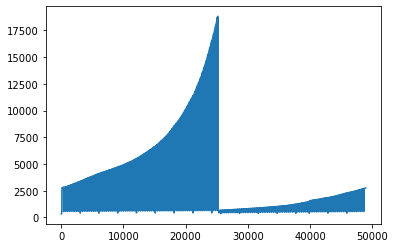

In [7]:
plt.plot(diamond_cat['price'])

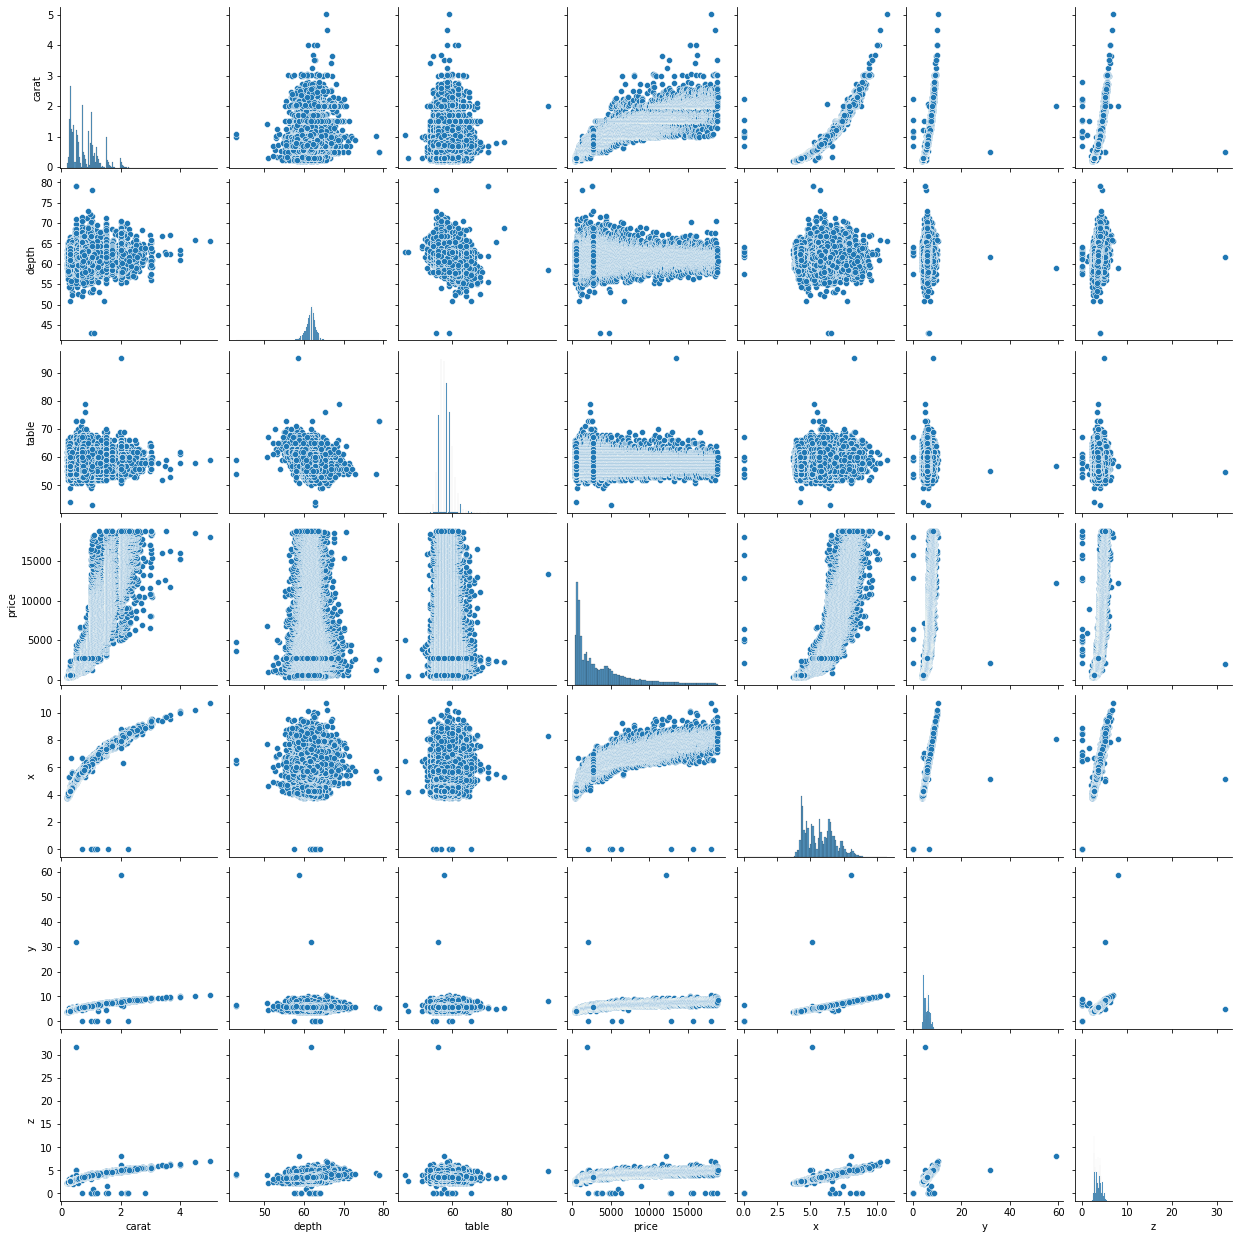

In [8]:
sns.pairplot(diamond_cat)

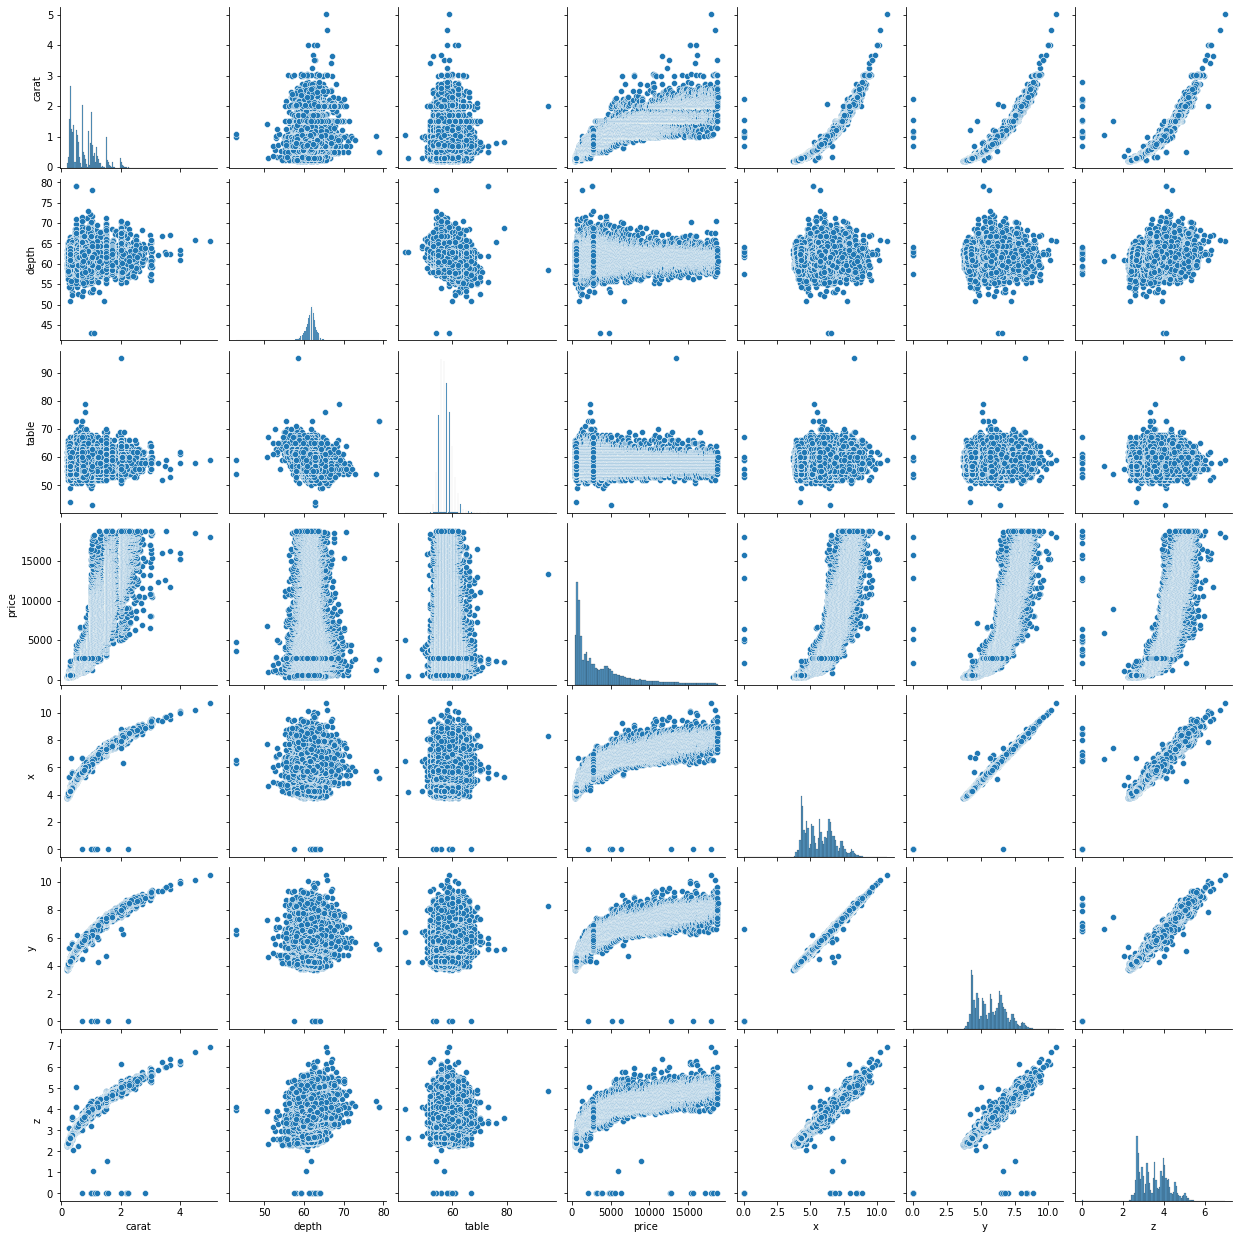

In [119]:
sns.pairplot(diamond_cat)

### Primeiro tratamento de outliers

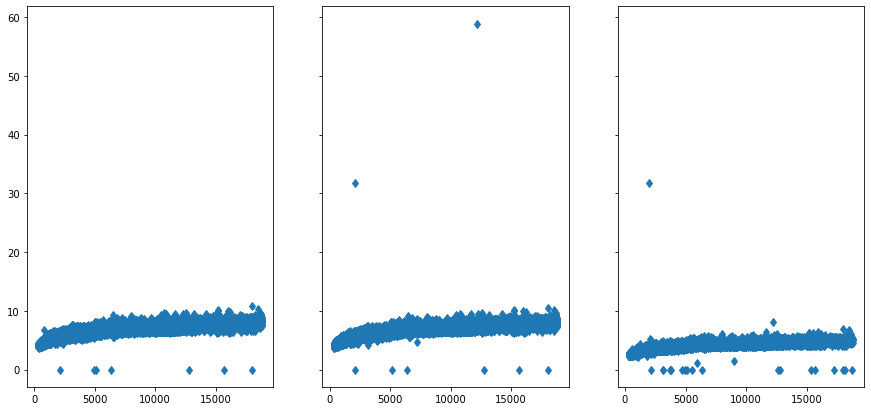

In [26]:
fig, ax = plt.subplots(1,3, sharex=True, sharey = True, figsize = (15, 7))

ax[0].plot(diamond_cat['price'], diamond_cat['x'], marker='d', linestyle = 'None')

ax[1].plot(diamond_cat['price'], diamond_cat['y'], marker='d', linestyle = 'None')

ax[2].plot(diamond_cat['price'], diamond_cat['z'], marker='d', linestyle = 'None')

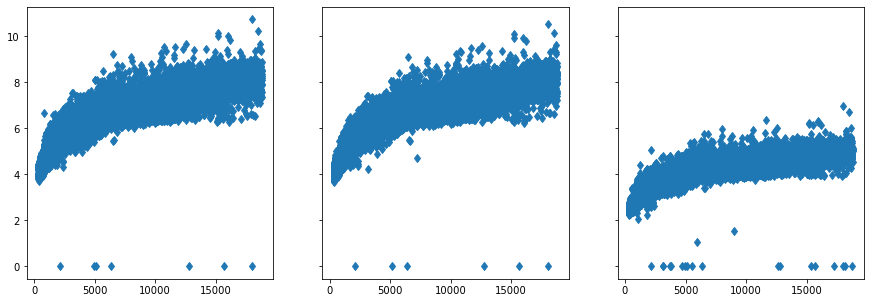

In [123]:
fig, ax = plt.subplots(1,3, sharex=True, sharey = True, figsize = (15, 5))

ax[0].plot(diamond_cat['price'], diamond_cat['x'], marker='d', linestyle = 'None')

ax[1].plot(diamond_cat['price'], diamond_cat['y'], marker='d', linestyle = 'None')

ax[2].plot(diamond_cat['price'], diamond_cat['z'], marker='d', linestyle = 'None')

In [44]:
maskz = diamond_cat.z < 12
masky = diamond_cat.y < 12

In [50]:
diamond_cat = diamond_cat.loc[(masky & maskz), :]

## Tentativa pela média

In [74]:
diamond_cat['price'].mean()

3934.409644462607

In [11]:
diamonds_rick['price_predicted'] = diamond_cat['price'].mean()

In [12]:
diamonds_rick.to_csv('prev1.csv') # erro de 3980.71 dolares usando a média

##  Tentativa pela regressão linear com carat

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model=LinearRegression()

In [11]:
X=diamond_cat[['carat']]
y=diamond_cat['price']

In [12]:
model.fit(X, y)

LinearRegression()

In [15]:
diamonds_rick['price_predicted'] = model.predict(diamonds_rick[['carat']])

In [18]:
diamonds_rick.to_csv('prev2.csv') #erro de 1605.15175 dolares usando a regressão linear pelo carat

In [80]:
diamonds_rick.to_csv('prev5.csv')

## Tentativa por regressão com depth

In [37]:
X=diamond_cat[['depth']]
y=diamond_cat['price']

In [38]:
model.fit(X, y)

LinearRegression()

In [39]:
diamonds_rick['price_predicted'] = model.predict(diamonds_rick[['depth']])

In [40]:
diamonds_rick.to_csv('prev3.csv') #erro de 3981.31762 dolares usando a regressão linear pelo depth

## Tentativa por regressão com multipla com x e y

In [86]:
X=diamond_cat[['y', 'z']]
y=diamond_cat['price']

In [87]:
model.fit(X, y)

LinearRegression()

In [88]:
model.predict(diamonds_rick[['y','z']])

array([5482.45914613,  602.53715313, 2200.47359437, ..., 5877.22163801,
       -223.18046738,   58.22363663])

In [91]:
diamonds_rick['price_predicted'] = model.predict(diamonds_rick[['y','z']])

In [46]:
diamonds_rick.to_csv('prev4.csv') #erro de 1897.790 dolares usando a regressão linear pelo x,y

In [92]:
diamonds_rick.to_csv('prev6.csv')

## Tentativa por regressão multipla x, y, z

In [53]:
model=LinearRegression()

In [54]:
X=diamond_cat[['x','y', 'z']]
y=diamond_cat['price']

In [55]:
model.fit(X, y)

LinearRegression()

In [57]:
model.predict(diamonds_rick[['x', 'y','z']])

array([5431.59641522,  674.9097259 , 2096.21791011, ..., 6162.90715001,
       -348.97005454,  -34.46660315])

In [58]:
diamonds_rick['price_predicted'] = model.predict(diamonds_rick[['x','y','z']])

In [59]:
diamonds_rick.to_csv('prev7.csv') # erro 1894

## Tentativa com x, y, z e carat

In [60]:
model=LinearRegression()

In [61]:
X=diamond_cat[['x','y', 'z', 'carat']]
y=diamond_cat['price']

In [62]:
model.fit(X, y)

LinearRegression()

In [63]:
model.predict(diamonds_rick[['x', 'y','z', 'carat']])

array([4717.72490121,  920.79269405, 1584.42355656, ..., 5645.20940631,
        442.88830497,  556.67856313])

In [65]:
diamonds_rick['price_predicted'] = model.predict(diamonds_rick[['x','y','z', 'carat']])

In [66]:
diamonds_rick.to_csv('prev8.csv') # erro 1577.382

## Previsão pela cor

### J

In [77]:
maskJ = diamond_cat.color == 'J'
diamond_cat.loc[(maskJ), :]

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
8,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
9,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
11,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
...,...,...,...,...,...,...,...,...,...,...
48716,0.90,Premium,J,SI2,63.0,59.0,2717,6.14,6.11,3.86
48800,0.90,Good,J,SI1,63.2,60.0,2729,6.09,6.12,3.86
48855,0.82,Ideal,J,VS2,61.6,56.0,2741,6.00,6.04,3.71
48858,0.83,Ideal,J,VS2,62.3,55.0,2742,6.01,6.03,3.75


In [78]:
XJ=diamond_cat.loc[maskJ,['x','y', 'z', 'carat']]
yJ=diamond_cat.loc[maskJ,'price']

In [79]:
modelJ=LinearRegression()

In [80]:
modelJ.fit(XJ, yJ)

LinearRegression()

In [82]:
diamonds_rick.loc[diamonds_rick['color']== 'J','price_predicted'] = modelJ.predict(diamonds_rick.loc[diamonds_rick['color']== 'J',['x', 'y','z', 'carat']])

### I, H

In [100]:
maskI = (diamond_cat.color == 'I') | (diamond_cat.color == 'H')
diamond_cat.loc[(maskI), :]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
6,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
7,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
14,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
...,...,...,...,...,...,...,...,...,...,...
48921,0.76,Premium,I,VS1,59.3,62.0,2753,5.93,5.85,3.49
48922,0.76,Ideal,I,VVS1,62.2,55.0,2753,5.89,5.87,3.66
48926,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
48927,0.73,Ideal,I,VS2,61.6,55.0,2756,5.82,5.84,3.59


In [103]:
XI=diamond_cat.loc[maskI,['x','y', 'z', 'carat']]
yI=diamond_cat.loc[maskI,'price']

In [104]:
modelI=LinearRegression()

In [107]:
modelI.fit(XI, yI)

LinearRegression()

In [108]:
modelI.predict(diamonds_rick.loc[(diamonds_rick['color']== 'I') | (diamonds_rick['color']== 'H'),['x', 'y','z', 'carat']])

array([4275.53989219, 1132.59363639, 2086.93141862, ..., 3127.99524851,
        731.0721422 , 9346.51468308])

In [109]:
diamonds_rick.loc[(diamonds_rick['color']== 'I') | (diamonds_rick['color']== 'H'),'price_predicted'] = modelI.predict(diamonds_rick.loc[(diamonds_rick['color']== 'I') | (diamonds_rick['color']== 'H'),['x', 'y','z', 'carat']])

### D, E, F, G

In [111]:
maskD = (diamond_cat.color == 'D') | (diamond_cat.color == 'E')| (diamond_cat.color == 'F')| (diamond_cat.color == 'G')
diamond_cat.loc[(maskD), :]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
10,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
12,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
13,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [112]:
XD=diamond_cat.loc[maskD,['x','y', 'z', 'carat']]
yD=diamond_cat.loc[maskD,'price']

In [113]:
modelD=LinearRegression()

In [114]:
modelD.fit(XD, yD)

LinearRegression()

In [117]:
diamonds_rick.loc[(diamond_cat.color == 'D') | (diamond_cat.color == 'E')| (diamond_cat.color == 'F')| (diamond_cat.color == 'G'),'price_predicted'] = modelD.predict(diamonds_rick.loc[(diamond_cat.color == 'D') | (diamond_cat.color == 'E')| (diamond_cat.color == 'F')| (diamond_cat.color == 'G'),['x', 'y','z', 'carat']])

In [118]:
diamonds_rick.to_csv('prev9.csv')

C:\Users\carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_predicted', ylabel='carat'>

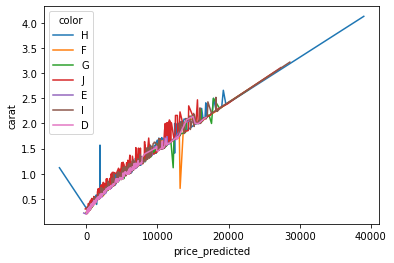

In [125]:
sns.lineplot(diamonds_rick.price_predicted,diamonds_rick.carat, hue=diamonds_rick.color)

## Verificação de outliers

In [57]:
diamond_cat.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.039719,64.076712,59.023836,4341.959589,6.233685,6.170048,3.976534
Good,0.853792,62.371236,58.676052,3969.581139,5.850840,5.862568,3.647040
Ideal,0.702345,61.710613,55.951897,3455.671869,5.506144,5.518992,3.400821
Premium,0.891358,61.269313,58.741513,4581.900376,5.971966,5.943502,3.646122
Very Good,0.806991,61.816068,57.956638,3983.634499,5.741506,5.770999,3.560385


In [22]:
diamond_cat.groupby('cut').describe()['price']

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1460.0,4341.959589,3556.754297,361.0,2035.75,3270.5,5229.5,18574.0
Good,4443.0,3969.581139,3707.289197,327.0,1168.00,3087.0,5090.5,18788.0
Ideal,19608.0,3455.671869,3807.408351,340.0,878.00,1810.5,4675.0,18806.0
Premium,12507.0,4581.900376,4349.112795,326.0,1042.50,3170.0,6300.0,18823.0
Very Good,10922.0,3983.634499,3928.621899,336.0,910.00,2651.5,5383.0,18818.0


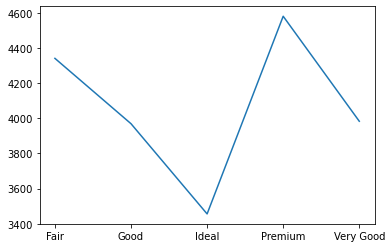

In [66]:
plt.plot(diamond_cat.groupby('cut').mean()['price']) # Fairs e premiums tem as maiores médias

In [59]:
diamond_cat.groupby('color').mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.656992,61.707955,57.385130,3164.235552,5.414612,5.418826,3.341875
E,0.658942,61.660785,57.490585,3091.383020,5.413941,5.421500,3.342300
F,0.736260,61.701872,57.420559,3722.122848,5.615234,5.619785,3.464960
G,0.770128,61.757169,57.290794,3991.018859,5.675153,5.677882,3.503516
H,0.909887,61.833837,57.518337,4477.320472,5.978555,5.980866,3.692901
I,1.030982,61.853078,57.570239,5121.677848,6.230671,6.230626,3.850616
J,1.164531,61.888268,57.798701,5342.467323,6.523567,6.523402,4.036268


In [23]:
diamond_cat.groupby('color').describe()['price']

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6160.0,3164.235552,3345.747922,357.0,911.00,1828.0,4205.75,18693.0
E,8869.0,3091.383020,3358.203543,326.0,888.00,1746.0,4027.00,18731.0
F,8653.0,3722.122848,3780.755607,342.0,982.00,2340.0,4852.00,18791.0
G,10287.0,3991.018859,4039.786039,354.0,931.00,2216.0,6048.00,18818.0
H,7542.0,4477.320472,4220.518368,337.0,977.50,3437.0,5975.00,18803.0
I,4889.0,5121.677848,4731.475968,334.0,1134.00,3767.0,7256.00,18823.0
J,2540.0,5342.467323,4441.118287,335.0,1874.75,4271.5,7695.00,18710.0


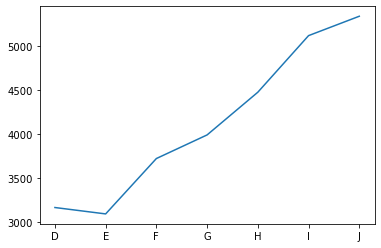

In [25]:
plt.plot(diamond_cat.groupby('color').mean()['price']) # cor tem uma grande influencia 

In [60]:
diamond_cat.groupby('clarity').mean()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.282644,62.761702,58.297720,3931.088146,6.758328,6.706337,4.211793
IF,0.507247,61.501674,56.488159,2874.269684,4.974743,4.996696,3.065356
SI1,0.851919,61.855544,57.657598,4006.569726,5.892237,5.891973,3.642157
SI2,1.079498,61.773360,57.922824,5080.820272,6.404280,6.401197,3.949976
VS1,0.725395,61.668117,57.306068,3823.337226,5.568886,5.579482,3.439915
VS2,0.764452,61.729187,57.413052,3927.013843,5.658113,5.659487,3.491809
VVS1,0.502894,61.634688,56.873351,2522.024089,4.959277,4.973933,3.061168
VVS2,0.594947,61.666063,57.032449,3273.212082,5.215448,5.228803,3.219579


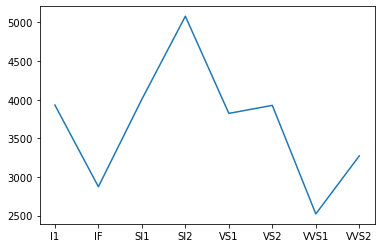

In [61]:
plt.plot(diamond_cat.groupby('clarity').mean()['price']) # Sl1 e Sl2 tem as maiores médias

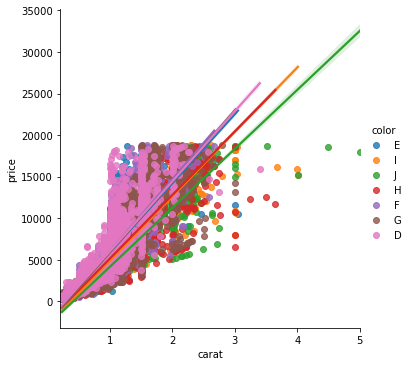

In [95]:
import seaborn as sns

sns.lmplot('carat', 'price', hue='color', data=diamond_cat)

C:\Users\carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


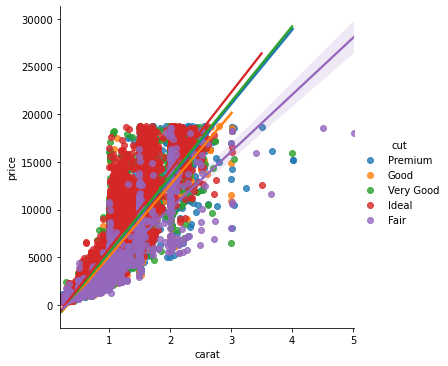

In [127]:
import seaborn as sns

sns.lmplot('carat', 'price', hue='cut', data=diamond_cat)

C:\Users\carla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


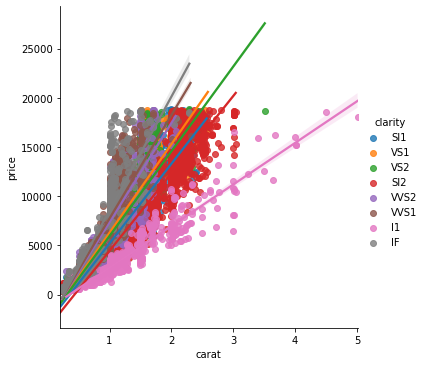

In [128]:
import seaborn as sns

sns.lmplot('carat', 'price', hue='clarity', data=diamond_cat)

In [ ]:
pd.categorical